In [14]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
import payments_manager as pm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
# Importa la función para crear la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import payments_manager as pm

df = pm.df('df_jo')
#df_jo.info()

# Convertir las columnas 'created_at' y 'moderated_at' a datetime
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['moderated_at'] = pd.to_datetime(df['moderated_at'])

#for col in df.select_dtypes(include=['datetime64']).columns:
#    df[col] = df[col].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


,amount,n_backs,n_fees,n_inc_back,n_inc_fees,type_incident,type_instant_payment,type_postpone,transfer_type_regular,category_nice,category_rejected_direct_debit,charge_moment_before
0,1.0,0,0,1,0,0,0,0,1,0,0,0


,id_cr,id_fe,fe_cr_id,user_id,active,created_at,created_at_fe,amount,fee,stat_cr,...,created_at_m,n_cr_fe_m,created_at_d,GBP_EUR,BTC_GBP,inflation,unemploy_rate,moderada,predicted_class,predicted_probability
0,3,0,NaN,47,1,2019-11-19 13:57:53.511561,NaT,1.0,0.0,canceled,...,11,NaN,2019-11-19,1.16935,6347.577148,1.3,3.9,1,1,60.484933
1,4,0,NaN,99001309,0,2019-12-09 14:47:35.190714,NaT,100.0,0.0,money_back,...,12,1.0,2019-12-09,1.18803,5630.115723,1.3,4.0,1,0,34.266231
2,5,0,NaN,804,1,2019-12-10 19:05:21.596873,NaT,100.0,0.0,rejected,...,12,NaN,2019-12-10,1.18800,5543.707520,1.3,4.0,1,1,73.347011
3,6,0,NaN,812,1,2019-12-10 19:05:48.921042,NaT,100.0,0.0,direct_debit_rejected,...,12,NaN,2019-12-10,1.18800,5543.707520,1.3,4.0,1,1,73.347011
4,7,0,NaN,191,1,2019-12-10 19:13:35.825460,NaT,100.0,0.0,rejected,...,12,NaN,2019-12-10,1.18800,5543.707520,1.3,4.0,1,1,73.347011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32087,27006,21181,27006.0,55916,1,2020-11-01 23:07:55.231487,2020-11-01 23:08:17.050811,50.0,5.0,money_back,...,11,1.0,2020-11-01,0.00000,10627.522461,0.7,5.3,0,0,3.106070
32088,27007,21182,27007.0,39339,1,2020-11-01 23:11:37.788849,2020-11-01 23:12:30.916635,100.0,5.0,money_back,...,11,1.0,2020-11-01,0.00000,10627.522461,0.7,5.3,0,0,0.307644
32089,27008,0,NaN,24505,1,2020-11-01 23:13:19.286745,NaT,50.0,0.0,rejected,...,11,NaN,2020-11-01,0.00000,10627.522461,0.7,5.3,1,1,99.871084
32090,27009,21183,27009.0,100781,1,2020-11-01 23:15:28.102894,2020-11-01 23:16:45.505687,60.0,5.0,money_back,...,11,1.0,2020-11-01,0.00000,10627.522461,0.7,5.3,0,0,11.569110


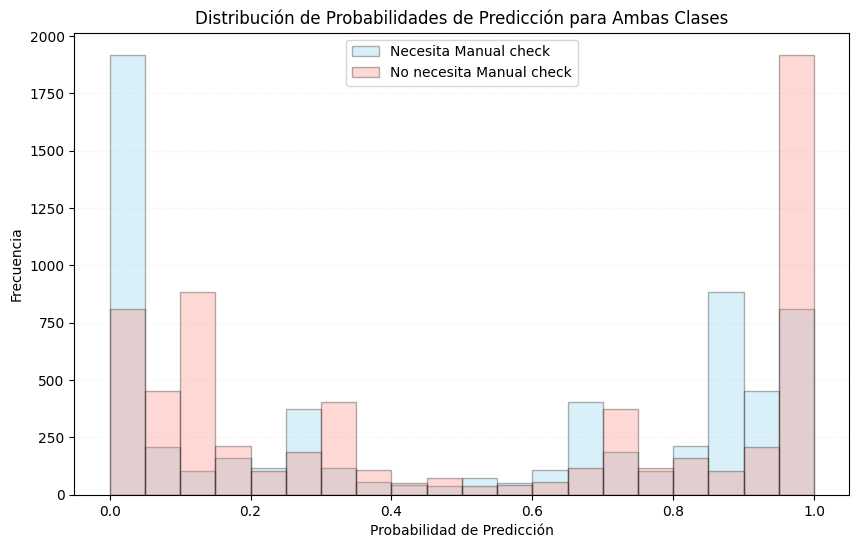

predicciones_probabilidades:
 [[2.06512324e-01 7.93487676e-01]
 [1.27913414e-01 8.72086586e-01]
 [1.05140776e-01 8.94859224e-01]
 [9.97060644e-01 2.93935621e-03]
 [2.04697198e-04 9.99795303e-01]
 [1.34714824e-01 8.65285176e-01]
 [6.13823175e-05 9.99938618e-01]
 [1.43256752e-04 9.99856743e-01]
 [2.35423114e-02 9.76457689e-01]
 [6.56093433e-01 3.43906567e-01]]

Coeficientes del modelo de regresión logística (ordenados por magnitud):
charge_moment_before: -2.9985
n_inc_fees: 2.9903
type_postpone: 2.8210
type_instant_payment: -1.8795
type_incident: 1.5215
n_backs: -1.4198
transfer_type_regular: -1.2125
n_inc_back: 1.1437
n_fees: -1.0963
category_rejected_direct_debit: 0.6682
category_nice: 0.6384
amount: 0.1535


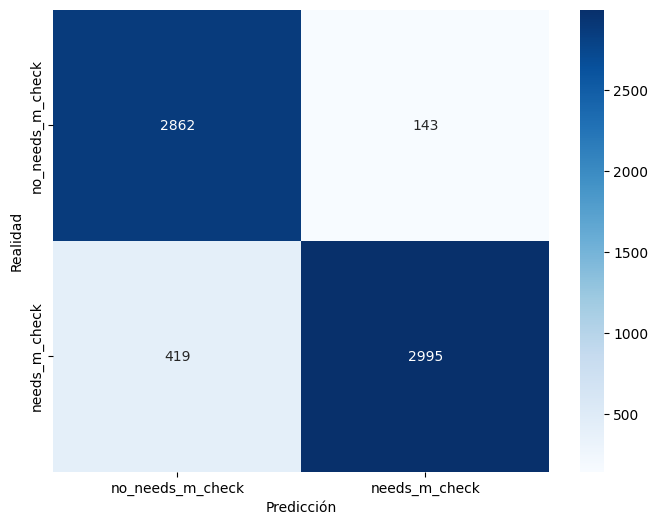

Accuracy: 0.9124474217167783
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3005
           1       0.95      0.88      0.91      3414

    accuracy                           0.91      6419
   macro avg       0.91      0.91      0.91      6419
weighted avg       0.92      0.91      0.91      6419



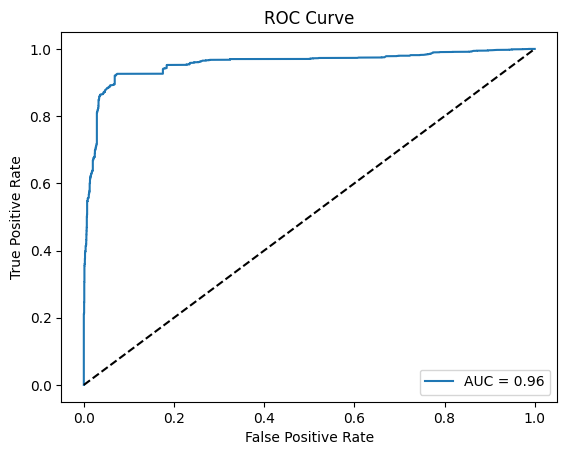

In [26]:
df = pm.df('df_jo')

for col in df.select_dtypes(include=['timedelta64']).columns:
    df[col] = df[col].apply(lambda x: x / pd.to_timedelta(1, unit='d') if pd.notnull(x) else None)

df['moderada'] = df['moderated_at'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# Variables predictoras (ajusta según los datos disponibles)
columnas = ['amount','fee','n_backs','n_fees','n_inc_back','n_inc_fees','to_reimbur', 'type', 'transfer_type','category','charge_moment'] #'user_id',   
columnas = ['amount','n_backs','n_fees','n_inc_back','n_inc_fees', 'transfer_type', 'type','category','charge_moment'] #'user_id',   

X = df[columnas].copy()

# Categoricas
X = pd.get_dummies(X, columns=['type', 'transfer_type', 'category','charge_moment'], drop_first=True, dtype =int)

# Crear el escalador
display(X.head(1))
scaler = StandardScaler()
# Estandarizar todas las columnas
normalizado = scaler.fit_transform(X)
# Convertir de nuevo a DataFrame, preservando nombres de columnas e índices
X = pd.DataFrame(normalizado, columns=X.columns, index=df.index)
X.fillna(0, inplace=True)
#X.info()

y = df['needs_m_check_recov'].copy()  #needs_m_check_recov #moderada # La columna de la variable objetivo
#display(X.head(2))

feature_names = X.columns # Obtener los nombres de las características
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Crea el clasificador de regresión logística. El 'liblinear' usa metodo de optimización de minimos cuadrados generalizados (L2) y soporta la regularización L1 y L2
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train) # Entrena el clasificador
predicciones = clf.predict(X_test) # Realiza predicciones sobre el conjunto de prueba
len(predicciones)

#result['predicted_manual_checks'] = predicciones * 100  # Convertir a porcentaje para comparar
# # Extraer las probabilidades de la clase positiva (1)
# probabilidades_clase_positiva = predicciones_probabilidades[:, 1]  # Toma solo la segunda columna
# print (len(probabilidades_clase_positiva))
# print (len(result))

# # Asegurarse de que el número de filas coincida entre result y las predicciones
# if len(probabilidades_clase_positiva) == len(result):
#     result['predicted_manual_checks'] = probabilidades_clase_positiva * 100  # Convertir a porcentaje
# else:
#     print("El tamaño de las predicciones no coincide con el tamaño del DataFrame 'result'.")

# df['predicted_manual_checks'] = predicted_manual_checks * 100  # Convertir a porcentaje para comparar



# Generar predicciones para el conjunto completo (X)
predicciones_completas = clf.predict(X)  # Predicción de clase
probabilidades_clase_positiva = clf.predict_proba(X)[:, 1]  # Probabilidad de la clase positiva

# Añadir las predicciones como nuevas columnas al DataFrame original
df['predicted_class'] = predicciones_completas
df['predicted_probability'] = probabilidades_clase_positiva * 100  # Convertir a porcentaje
display(df)


# Genera las probabilidades de predicción
predicciones_probabilidades = clf.predict_proba(X_test)

# Crea un histograma de las probabilidades de predicción para ambas clases
plt.figure(figsize=(10, 6)) 
plt.hist(predicciones_probabilidades[:, 0], bins=20, color="skyblue", edgecolor="black", alpha=0.3, label="Necesita Manual check")
# Histograma para la clase positiva (no need manual check)
plt.hist(predicciones_probabilidades[:, 1], bins=20, color="salmon", edgecolor="black", alpha=0.3, label="No necesita Manual check")
# Título y etiquetas de los ejes
plt.title("Distribución de Probabilidades de Predicción para Ambas Clases")
plt.xlabel("Probabilidad de Predicción")
plt.ylabel("Frecuencia")
plt.legend(loc="upper center") 
# Muestra la leyenda en el gráfico
plt.grid(axis="y", linestyle="--", alpha=0.1)
plt.show()

# Muestra las primeras 10 probabilidades de predicción
print(f"predicciones_probabilidades:\n {predicciones_probabilidades[:10]}\n")

# Obtén los coeficientes y asigna los nombres de las características
coeficientes = clf.coef_[0]  # clf.coef_ es un array bidimensional, tomamos la primera fila
feature_coef = list(zip(feature_names, coeficientes))

# Ordena las características por el valor absoluto del coeficiente en orden descendente
feature_coef_sorted = sorted(feature_coef, key=lambda x: abs(x[1]), reverse=True)

# Imprime cada variable junto con su coeficiente ordenado
print("Coeficientes del modelo de regresión logística (ordenados por magnitud):")
for feature, coef in feature_coef_sorted:
    print(f"{feature}: {coef:.4f}")

# Genera la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)
columnas = ['no_needs_m_check', 'needs_m_check'] # 0 para No necesita manual check y 1 para Sí necesita manual check

# Visualiza la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=columnas, yticklabels=columnas)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()
# Evaluate model performance
print("Accuracy:", clf.score(X_test, y_test))  # Accuracy score
print("Classification Report:\n", classification_report(y_test, predicciones))  # Classification report

#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicciones_probabilidades[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


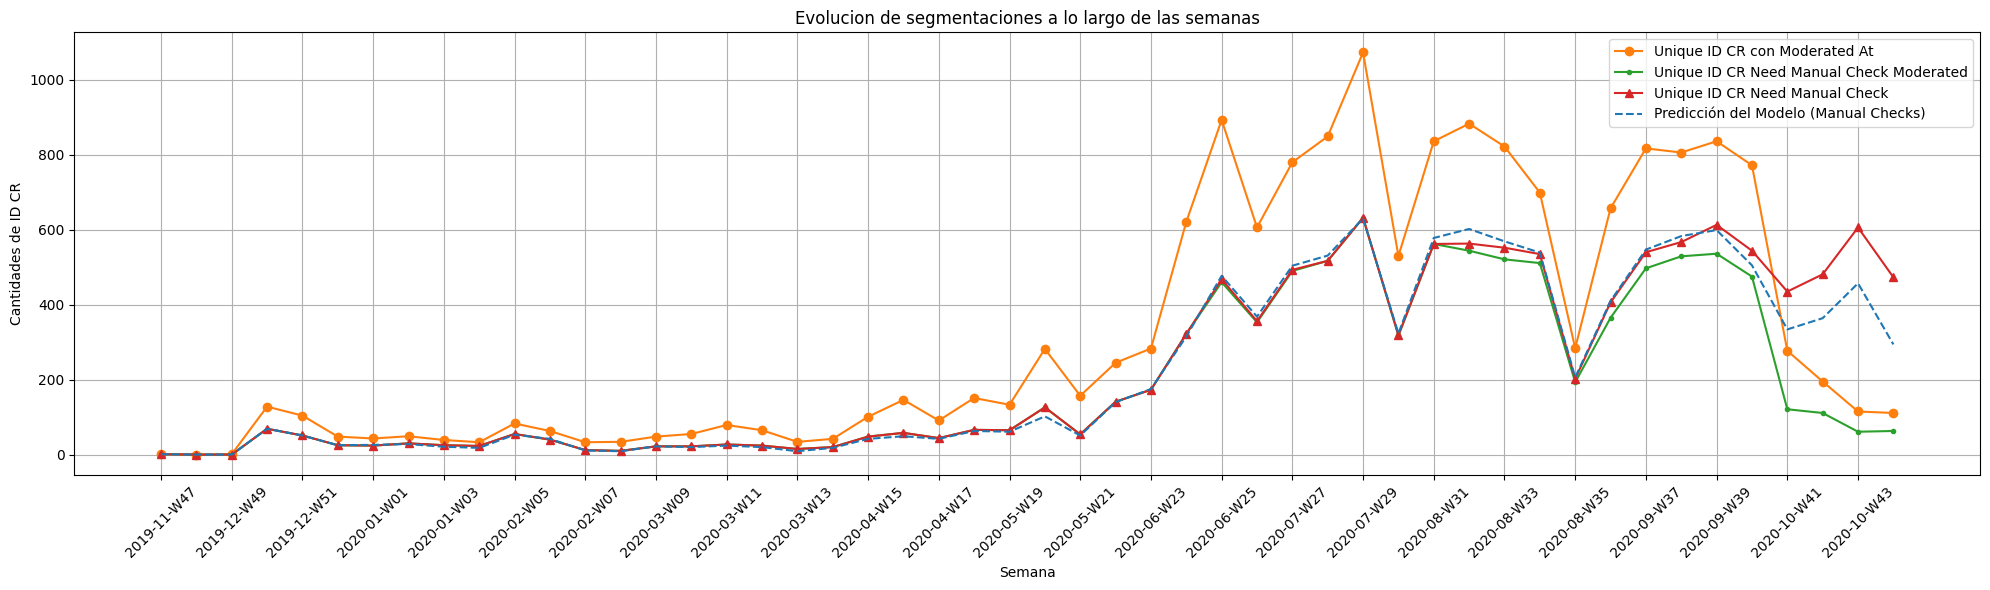

In [27]:
# Agrupar los datos por fecha 'created_at' y calcular las cantidades
result = df.groupby(pd.Grouper(key='created_at', freq='W-MON')).apply(
    lambda x: pd.Series({
        'unique_id_cr': x['id_cr'].nunique(),  # Contar los 'id_cr' únicos

        'unique_id_cr_with_moderated_at': x['id_cr'][x['moderated_at'].notna()].nunique(),  # 'id_cr' con moderación

        'unique_id_cr_need_manual_check_moderated': x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique(),  # 'id_cr' que necesitan revisión manual y están moderados

        'unique_id_cr_need_manual_check': x['id_cr'][(x['needs_m_check_recov'] == 1)].nunique(),  # 'id_cr' que necesitan revisión manual

        'predicted_manual_checks': x['id_cr'][(x['predicted_class'] == 1)].nunique(),  # 'id_cr' que necesitan revisión manual
        
        # 'difference_in_manual_check': x['id_cr'][(x['needs_m_check_recov'] == 1)].nunique() - 
        #                               x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique(),  # Diferencia en las revisiones manuales
        #  'efficiency_of_moderated_at': (
        #      x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique() / 
        #      x['id_cr'][x['moderated_at'].notna()].nunique() * 100  if x['id_cr'][x['moderated_at'].notna()].nunique() > 0 else 0
        # ),  # Eficiencia de 'moderated_at'
    }),
    include_groups=False  # Excluir las columnas de agrupación
).reset_index()

# Renombrar las columnas para que coincidan con la salida esperada
result.rename(columns={'created_at': 'date'}, inplace=True)

# Calcular el porcentaje de revisión manual (unique_id_cr_with_moderated_at / unique_id_cr)
result['manual_check_percentage'] = (result['unique_id_cr_with_moderated_at'] / result['unique_id_cr']) * 100

fig, ax = plt.subplots(figsize=(20, 6))
# Graficar las tres métricas en el mismo eje
ax.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Unique ID CR con Moderated At', marker='o', color='tab:orange')
ax.plot(result['date'], result['unique_id_cr_need_manual_check_moderated'], label='Unique ID CR Need Manual Check Moderated', marker='.', color='tab:green')
ax.plot(result['date'], result['unique_id_cr_need_manual_check'], label='Unique ID CR Need Manual Check', marker='^', color='tab:red')

ax.plot(result['date'], result['predicted_manual_checks'], label='Predicción del Modelo (Manual Checks)', linestyle='--', color='tab:blue')

# Formatear el eje x para mostrar el número de la semana y el año
week_labels = result['date'].dt.strftime('%Y-%m-W%U')  # Formato 'Año-Semana'
step = 2 # Seleccionar solo cada 2da semana para mostrar en el eje x
plt.xticks(ticks=result['date'][::step], labels=week_labels[::step], rotation=45)
ax.set_xlabel('Semana')
plt.ylabel('Cantidades de ID CR')
plt.title('Evolucion de segmentaciones a lo largo de las semanas')
plt.xticks(rotation=45) # Rotar las etiquetas del eje x para una mejor visibilidad
ax.legend() # Agregar leyenda
plt.tight_layout()  # Ajustar la distribución para evitar recortes
plt.grid()
plt.show()